In [146]:
import pandas as pd 

In [147]:
data = pd.read_csv('data/wind_records1.csv')

In [148]:
type(data)

pandas.core.frame.DataFrame

# I. Eploratory Data Analysis

In [149]:
data.head(10)

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector
0,19/10/2015,10.7,11.0,7.7,13.4,19604,5140,45.42,36243.04,251052,197078,65100
1,20/10/2015,11.0,11.0,7.7,13.4,19504,20033,45.31,35696.75,224741,197028,63312
2,21/10/2015,11.9,11.0,7.7,13.4,67659,47331,38.94,35440.56,169912,197025,82050
3,22/10/2015,12.4,11.0,7.7,13.4,59592,53625,41.92,34344.06,187311,197216,83924
4,23/10/2015,11.5,11.0,7.7,13.4,29528,42154,39.44,35178.15,201186,197232,92968
5,24/10/2015,11.5,11.0,7.7,13.4,63763,40935,37.89,31231.58,139535,191502,104118
6,25/10/2015,10.3,11.0,7.7,13.4,35042,32757,40.54,31009.96,154054,186804,117428
7,26/10/2015,10.8,10.5,7.4,13.3,58057,32062,40.21,34993.58,216421,174501,114858
8,27/10/2015,12.1,10.5,7.4,13.3,44217,23752,40.89,36149.08,236634,180142,107610
9,28/10/2015,12.1,10.5,7.4,13.3,23541,17834,38.78,36239.94,266076,186058,97744


In [150]:
data.tail(10)

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector
1452,10/10/2019,12.5,12.4,10.1,14.8,177371,84369,31.47,29301.96,123721,148820,90496
1453,11/10/2019,13.3,12.3,10.0,14.7,175717,95027,26.79,29847.77,91504,158252,98516
1454,12/10/2019,12.3,12.2,9.8,14.6,61479,43001,36.20,28796.21,213629,163004,135450
1455,13/10/2019,12.3,12.1,9.6,14.5,91647,8820,34.49,29128.71,247445,163018,124424
1456,14/10/2019,11.5,12.0,9.4,14.4,69842,11882,42.44,33056.77,350442,163148,122510
1457,15/10/2019,11.3,11.9,9.2,14.4,55744,20142,44.17,32218.73,355321,163132,101104
1458,16/10/2019,11.9,11.8,9.0,14.3,104513,37994,46.13,31280.44,260279,163108,137272
1459,17/10/2019,11.0,11.7,8.9,14.2,93016,42696,42.95,32065.77,318553,163004,49104
1460,18/10/2019,10.7,11.6,8.7,14.1,120781,18629,36.87,31811.44,274464,162938,90026
1461,19/10/2019,10.7,11.5,8.5,14.0,98801,53172,29.88,28500.15,180892,162952,141778


It's a table with 11 parameters, that look like time series, starting on 19th October 2015 to 19th October 2019 !

In [151]:
data.index

RangeIndex(start=0, stop=1462, step=1)

In [152]:
data.columns

Index(['DATE', 'Temp_outturn', 'Normal_temp', 'Low_temp', 'High_temp',
       'Off_wind', 'On_wind', 'Price', 'Demand', 'gas', 'nuclear',
       'interconnector'],
      dtype='object')

All these parameters have an impact on the price at which electricity is sold on the wholesale market (the Price parameter here) so it will be important to use them to determine how they affect prices and potentially be able to predict future prices based on these variables. We are likely have to use a linear regression model in order to do that exercice

In [153]:
data.dtypes

DATE               object
Temp_outturn      float64
Normal_temp       float64
Low_temp          float64
High_temp         float64
Off_wind            int64
On_wind             int64
Price             float64
Demand            float64
gas                 int64
nuclear             int64
interconnector      int64
dtype: object

In [154]:
data.shape

(1462, 12)

In [155]:
data.info()
#no null objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 12 columns):
DATE              1462 non-null object
Temp_outturn      1462 non-null float64
Normal_temp       1462 non-null float64
Low_temp          1462 non-null float64
High_temp         1462 non-null float64
Off_wind          1462 non-null int64
On_wind           1462 non-null int64
Price             1462 non-null float64
Demand            1462 non-null float64
gas               1462 non-null int64
nuclear           1462 non-null int64
interconnector    1462 non-null int64
dtypes: float64(6), int64(5), object(1)
memory usage: 137.1+ KB


In [156]:
data.describe()

,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,11.699795,11.145759,8.331669,13.841245,66353.824897,34351.040356,45.409815,31611.273529,260044.521204,175643.774966,100700.222982
std,5.047663,4.347192,5.109766,4.246783,39998.809336,24586.485896,12.499062,4689.126921,85023.466680,21787.836364,48450.128464
min,-2.000000,5.100000,0.400000,8.000000,2560.000000,1099.000000,5.810000,22010.830000,26006.000000,99088.000000,-102096.000000
25%,7.800000,6.600000,3.200000,9.700000,34941.250000,15142.000000,36.855000,28242.337500,197598.000000,162493.250000,82369.000000
50%,11.300000,11.100000,8.100000,13.500000,60280.000000,29202.500000,43.900000,30710.000000,266516.000000,178718.500000,111874.000000
75%,16.000000,15.375000,13.200000,17.600000,91110.500000,49596.000000,52.407500,35171.560000,321179.000000,191342.500000,134804.500000
max,24.900000,18.200000,16.400000,21.500000,201485.000000,116609.000000,197.450000,43222.710000,492039.000000,216959.000000,207538.000000


In [157]:
data["DATE"] = pd.to_datetime(data["DATE"])
data["DATE"].head()

0   2015-10-19
1   2015-10-20
2   2015-10-21
3   2015-10-22
4   2015-10-23
Name: DATE, dtype: datetime64[ns]

In [158]:
data.Off_wind

0        19604
1        19504
2        67659
3        59592
4        29528
5        63763
6        35042
7        58057
8        44217
9        23541
10       64636
11       63721
12       29927
13        3317
14        8643
15       18655
16       13688
17       53115
18       71444
19       68235
20       72485
21       91525
22       91227
23       83754
24       72962
25       93467
26       85886
27       93581
28       83603
29       72163
         ...  
1432     62714
1433    147333
1434     94254
1435    101876
1436    119876
1437     68904
1438    151118
1439    157235
1440    144350
1441    142057
1442     71811
1443    131473
1444    112134
1445     80709
1446    101809
1447     75581
1448    146885
1449    127216
1450    170618
1451    173094
1452    177371
1453    175717
1454     61479
1455     91647
1456     69842
1457     55744
1458    104513
1459     93016
1460    120781
1461     98801
Name: Off_wind, Length: 1462, dtype: int64

In [159]:
import numpy as np

import matplotlib.pyplot as plt


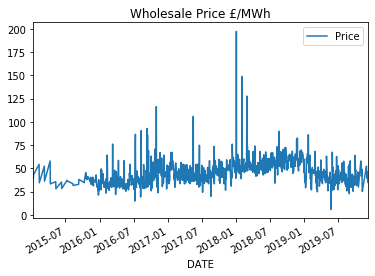

In [160]:
data.plot("DATE","Price")
plt.title("Wholesale Price £/MWh")
plt.show()

Very volatile prices, minimum (as seen on the description above) was below £6 in summer 2019 while the max was almost £200 in Winter 2018. Winter 2018 had a "beast from the east" storm and cold snap which was very likely to cause some stress on energy markets as the majority of the UK (and the continent) saw their demand increase. It would be interesting to see how this particular episode in prices compared to wind output levels

Resampling could be an option to remove that bias

In [161]:
#resample

In [162]:
data['wind_total'] = data['On_wind'] + data['Off_wind']

In [163]:
data.head()

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector,wind_total
0,2015-10-19,10.7,11.0,7.7,13.4,19604,5140,45.42,36243.04,251052,197078,65100,24744
1,2015-10-20,11.0,11.0,7.7,13.4,19504,20033,45.31,35696.75,224741,197028,63312,39537
2,2015-10-21,11.9,11.0,7.7,13.4,67659,47331,38.94,35440.56,169912,197025,82050,114990
3,2015-10-22,12.4,11.0,7.7,13.4,59592,53625,41.92,34344.06,187311,197216,83924,113217
4,2015-10-23,11.5,11.0,7.7,13.4,29528,42154,39.44,35178.15,201186,197232,92968,71682


In [164]:
# extract year and month columns for use later
data["Year"] = data["DATE"].dt.year
data["Month"] = data["DATE"].dt.month

data.head()

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month
0,2015-10-19,10.7,11.0,7.7,13.4,19604,5140,45.42,36243.04,251052,197078,65100,24744,2015,10
1,2015-10-20,11.0,11.0,7.7,13.4,19504,20033,45.31,35696.75,224741,197028,63312,39537,2015,10
2,2015-10-21,11.9,11.0,7.7,13.4,67659,47331,38.94,35440.56,169912,197025,82050,114990,2015,10
3,2015-10-22,12.4,11.0,7.7,13.4,59592,53625,41.92,34344.06,187311,197216,83924,113217,2015,10
4,2015-10-23,11.5,11.0,7.7,13.4,29528,42154,39.44,35178.15,201186,197232,92968,71682,2015,10


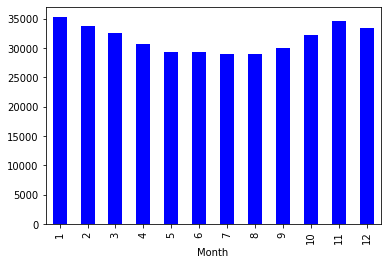

In [165]:
data.groupby("Month")["Demand"].mean().plot.bar(color='blue')


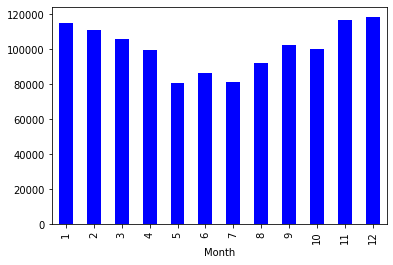

In [166]:
data.groupby("Month")["wind_total"].mean().plot.bar(color='blue')

Demand is in MW while wind, gas, nuclear outputs are in MWh so the comparison can't be made with numbers but we see a trend with a slightly lower demand between May and August, which matches the lowest wind output too

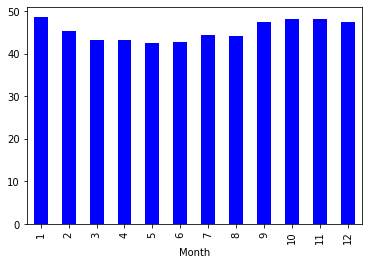

In [167]:
data.groupby("Month")["Price"].mean().plot.bar(color='blue')

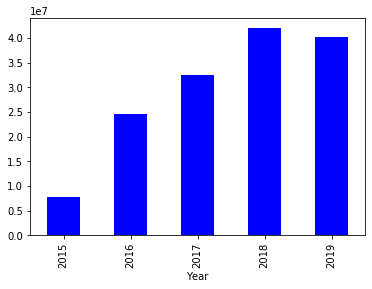

In [168]:
data.groupby("Year")["wind_total"].sum().plot.bar(color='blue')

The growth in annual wind output is expected as more wind farms are built in the UK. The drop in 2019 is probably due to the year not finished (data goes up to 19/10/2019)

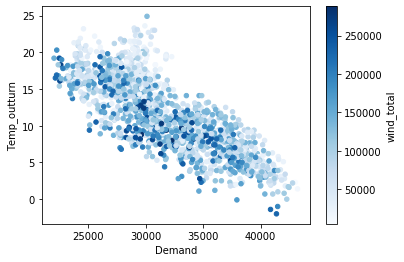

In [169]:
fig, ax = plt.subplots()
data.plot(kind='scatter', x='Demand', y= 'Temp_outturn', c ='wind_total', colormap='Blues', ax=ax)

As suspected power demand has a negative relationship with temperature. Most heating is not electric in the UK, so this is likely to be demand from "home activities" such as putting the kettle on, electric radiators, TV from people staying home instead of being outdoors. 

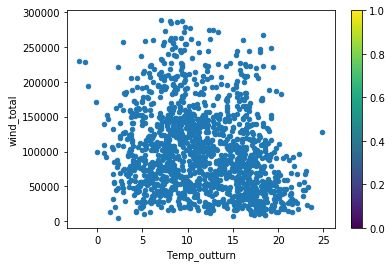

In [170]:
fig, ax = plt.subplots()
data.plot(kind='scatter', x='Temp_outturn', y ='wind_total', colormap='Blues', ax=ax)

In [171]:
from scipy import stats

In [172]:
data.corr()

,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month
Temp_outturn,1.000000,0.893937,0.892909,0.900649,-0.227104,-0.168597,-0.222522,-0.784097,-0.317592,-0.033349,0.136545,-0.219956,0.085781,0.134278
Normal_temp,0.893937,1.000000,0.994826,0.993111,-0.258796,-0.247258,-0.144688,-0.767792,-0.236795,-0.085936,0.108086,-0.273188,0.150333,0.114588
Low_temp,0.892909,0.994826,1.000000,0.986768,-0.251211,-0.238268,-0.142032,-0.770696,-0.237516,-0.101567,0.109417,-0.264469,0.163320,0.102706
High_temp,0.900649,0.993111,0.986768,1.000000,-0.267901,-0.260526,-0.149350,-0.764186,-0.231097,-0.081398,0.113480,-0.284667,0.134811,0.121916
Off_wind,-0.227104,-0.258796,-0.251211,-0.267901,1.000000,0.718374,-0.007267,0.031159,-0.515911,-0.332585,-0.023494,0.958712,0.357554,0.013041
On_wind,-0.168597,-0.247258,-0.238268,-0.260526,0.718374,1.000000,0.043378,0.021631,-0.513390,-0.268669,-0.067661,0.886544,0.322335,0.028177
Price,-0.222522,-0.144688,-0.142032,-0.149350,-0.007267,0.043378,1.000000,0.302778,0.302465,-0.114730,-0.222341,0.012899,0.278040,0.070944
Demand,-0.784097,-0.767792,-0.770696,-0.764186,0.031159,0.021631,0.302778,1.000000,0.598664,0.178578,-0.347416,0.029565,-0.251110,-0.056206
gas,-0.317592,-0.236795,-0.237516,-0.231097,-0.515911,-0.513390,0.302465,0.598664,1.000000,0.076875,-0.296246,-0.552974,-0.084388,-0.066153
nuclear,-0.033349,-0.085936,-0.101567,-0.081398,-0.332585,-0.268669,-0.114730,0.178578,0.076875,1.000000,-0.148536,-0.331014,-0.701520,0.077343


In [173]:
data_totalwind = data.drop('On_wind', axis =1)

In [174]:

data_totalwind.head()

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month
0,2015-10-19,10.7,11.0,7.7,13.4,19604,45.42,36243.04,251052,197078,65100,24744,2015,10
1,2015-10-20,11.0,11.0,7.7,13.4,19504,45.31,35696.75,224741,197028,63312,39537,2015,10
2,2015-10-21,11.9,11.0,7.7,13.4,67659,38.94,35440.56,169912,197025,82050,114990,2015,10
3,2015-10-22,12.4,11.0,7.7,13.4,59592,41.92,34344.06,187311,197216,83924,113217,2015,10
4,2015-10-23,11.5,11.0,7.7,13.4,29528,39.44,35178.15,201186,197232,92968,71682,2015,10


In [175]:
data_totalwind = data_totalwind.drop('Off_wind', axis=1)

In [176]:
data_totalwind.head()

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month
0,2015-10-19,10.7,11.0,7.7,13.4,45.42,36243.04,251052,197078,65100,24744,2015,10
1,2015-10-20,11.0,11.0,7.7,13.4,45.31,35696.75,224741,197028,63312,39537,2015,10
2,2015-10-21,11.9,11.0,7.7,13.4,38.94,35440.56,169912,197025,82050,114990,2015,10
3,2015-10-22,12.4,11.0,7.7,13.4,41.92,34344.06,187311,197216,83924,113217,2015,10
4,2015-10-23,11.5,11.0,7.7,13.4,39.44,35178.15,201186,197232,92968,71682,2015,10


In [177]:
data_totalwind.corr()

,Temp_outturn,Normal_temp,Low_temp,High_temp,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month
Temp_outturn,1.000000,0.893937,0.892909,0.900649,-0.222522,-0.784097,-0.317592,-0.033349,0.136545,-0.219956,0.085781,0.134278
Normal_temp,0.893937,1.000000,0.994826,0.993111,-0.144688,-0.767792,-0.236795,-0.085936,0.108086,-0.273188,0.150333,0.114588
Low_temp,0.892909,0.994826,1.000000,0.986768,-0.142032,-0.770696,-0.237516,-0.101567,0.109417,-0.264469,0.163320,0.102706
High_temp,0.900649,0.993111,0.986768,1.000000,-0.149350,-0.764186,-0.231097,-0.081398,0.113480,-0.284667,0.134811,0.121916
Price,-0.222522,-0.144688,-0.142032,-0.149350,1.000000,0.302778,0.302465,-0.114730,-0.222341,0.012899,0.278040,0.070944
Demand,-0.784097,-0.767792,-0.770696,-0.764186,0.302778,1.000000,0.598664,0.178578,-0.347416,0.029565,-0.251110,-0.056206
gas,-0.317592,-0.236795,-0.237516,-0.231097,0.302465,0.598664,1.000000,0.076875,-0.296246,-0.552974,-0.084388,-0.066153
nuclear,-0.033349,-0.085936,-0.101567,-0.081398,-0.114730,0.178578,0.076875,1.000000,-0.148536,-0.331014,-0.701520,0.077343
interconnector,0.136545,0.108086,0.109417,0.113480,-0.222341,-0.347416,-0.296246,-0.148536,1.000000,-0.043284,0.148143,-0.220753
wind_total,-0.219956,-0.273188,-0.264469,-0.284667,0.012899,0.029565,-0.552974,-0.331014,-0.043284,1.000000,0.369558,0.020191


I will add a day of the week to get a sense of demand and price seasonality within the week too 

In [178]:
data["day-of-week"] = data["DATE"].dt.day_name()
data.head()

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month,day-of-week
0,2015-10-19,10.7,11.0,7.7,13.4,19604,5140,45.42,36243.04,251052,197078,65100,24744,2015,10,Monday
1,2015-10-20,11.0,11.0,7.7,13.4,19504,20033,45.31,35696.75,224741,197028,63312,39537,2015,10,Tuesday
2,2015-10-21,11.9,11.0,7.7,13.4,67659,47331,38.94,35440.56,169912,197025,82050,114990,2015,10,Wednesday
3,2015-10-22,12.4,11.0,7.7,13.4,59592,53625,41.92,34344.06,187311,197216,83924,113217,2015,10,Thursday
4,2015-10-23,11.5,11.0,7.7,13.4,29528,42154,39.44,35178.15,201186,197232,92968,71682,2015,10,Friday


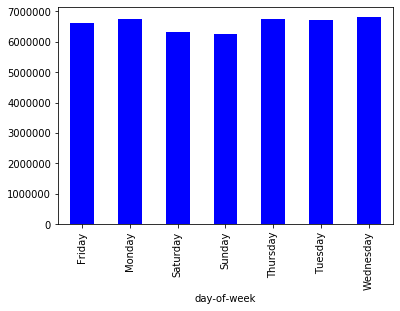

In [70]:
data.groupby("day-of-week")["Demand"].sum().plot.bar(color='blue')

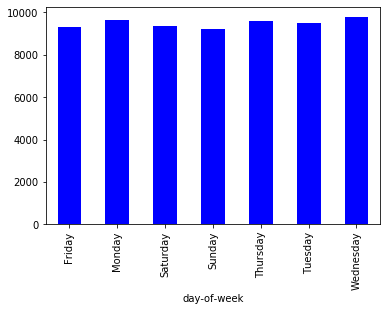

In [71]:
data.groupby("day-of-week")["Price"].sum().plot.bar(color='blue')

Price and demand follow the same seasonal patterns within week

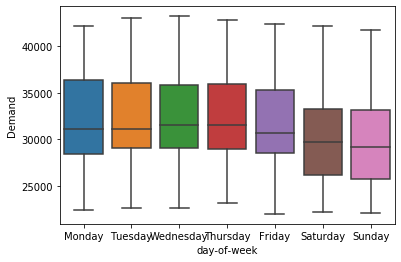

In [77]:
import seaborn as sns
sns.boxplot("day-of-week", "Demand", data=data)

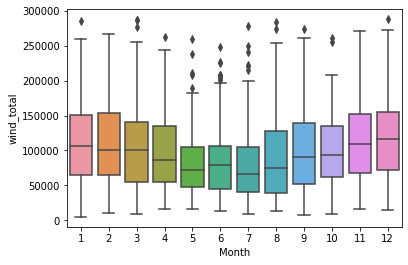

In [78]:
sns.boxplot("Month", "wind_total", data=data)

# II. Model 

#### 1.Training 

In [82]:
from sklearn import datasets, metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [83]:
data.head(1)

,DATE,Temp_outturn,Normal_temp,Low_temp,High_temp,Off_wind,On_wind,Price,Demand,gas,nuclear,interconnector,wind_total,Year,Month,day-of-week
0,2015-10-19,10.7,11.0,7.7,13.4,19604,5140,45.42,36243.04,251052,197078,65100,24744,2015,10,Monday


In [85]:
X = data[["Temp_outturn","Demand","wind_total","gas","nuclear","interconnector"]]
y = data["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(len(X_train), len(X_test))
print(len(y_train), len(y_test))

1023 439
1023 439


#### 2. Create the model 

In [87]:
model= LinearRegression()

#### 3. Fit the model 

In [125]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
print(model.intercept_, model.coef_)

41.40348736297327 [ 5.13482949e-05  4.17172923e-04  1.70712989e-05  3.13792746e-05
 -8.90830604e-05 -3.55205762e-05]


the coefficient for the paramater :
- temperature is 5.13
- Demand is 4.17
- Wind is 1.71
- gas is 3.137
- nuclear is - 8.91
- interconnector is -3.552

interpretation: £41/MWh as a basis seems high. Supply parameters such as Wind, gas, nuclear and interconnector should all have a negative effect on price (if supply > demand, price usually reduces). This is the case for Nuclear and Interconnector. However for wind and gas it isn't, this is interesting because of the nature of that type of supply. As we saw, wind will likely be higher in periods like winter when temperature, demand (and therefore price) is also higher so the model can't isolate the impact of wind on prices. Gas plants are fast to turn on and off and often used as peak plants for periods of peak demand and high prices, hence the relationship is also positive. 

In [145]:
coeff_df = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Temp_outturn,0.000051
Demand,0.000417
wind_total,0.000017
gas,0.000031
nuclear,-0.000089
interconnector,-0.000036


#### 4. Assess accuracy 

In [127]:
print('Variance score: %.2f' % model.score(X_test, y_test))

Variance score: 0.15


In [128]:
y_pred = model.predict(X_test)

In [129]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 8.556721205440171
MSE: 138.4459375968149
RMSE: 11.766305180336557


In [130]:
#comparing without fitted model:
y_pred_dumb = [y_train.mean()] * len(y_test)

print('RMSE: (dumb model):', np.sqrt(metrics.mean_squared_error(y_test, y_pred_dumb)))

RMSE: (dumb model): 12.740960416373586


In [133]:
compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred
                  })
compare

,Actual,Predicted
892,53.26,50.534419
1106,63.48,54.202915
413,58.41,54.974188
522,54.59,45.452134
1036,89.89,44.638356
614,31.38,36.570728
218,30.08,42.414202
1161,67.23,47.234312
649,42.48,36.792686
887,53.50,44.189594


does not look that close to real values

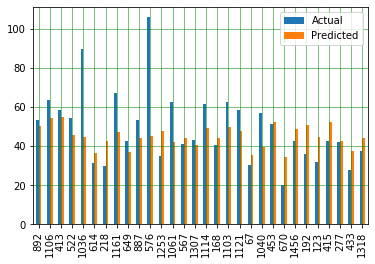

In [137]:
df = compare.head(30)
df.plot(kind='bar')
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

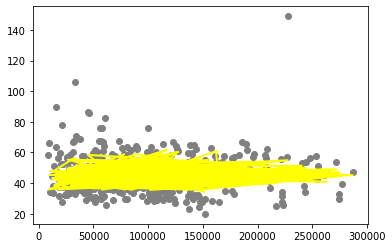

In [142]:
plt.scatter(X_test["wind_total"], y_test,  color='gray')
plt.plot(X_test["wind_total"], y_pred, color='yellow', linewidth=2)
plt.show()

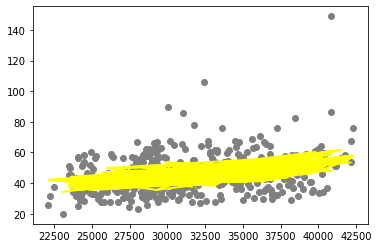

In [144]:
plt.scatter(X_test["Demand"], y_test,  color='gray')
plt.plot(X_test["Demand"], y_pred, color='yellow', linewidth=2)
plt.show()

# Conclusion

##### Very likely that our features are poor in this case, not easy to predict prices just based on the ones we chose. I do not believe the solution to this problem would have been more data but rather new features that are not auto correlated 